# Regression Analysis

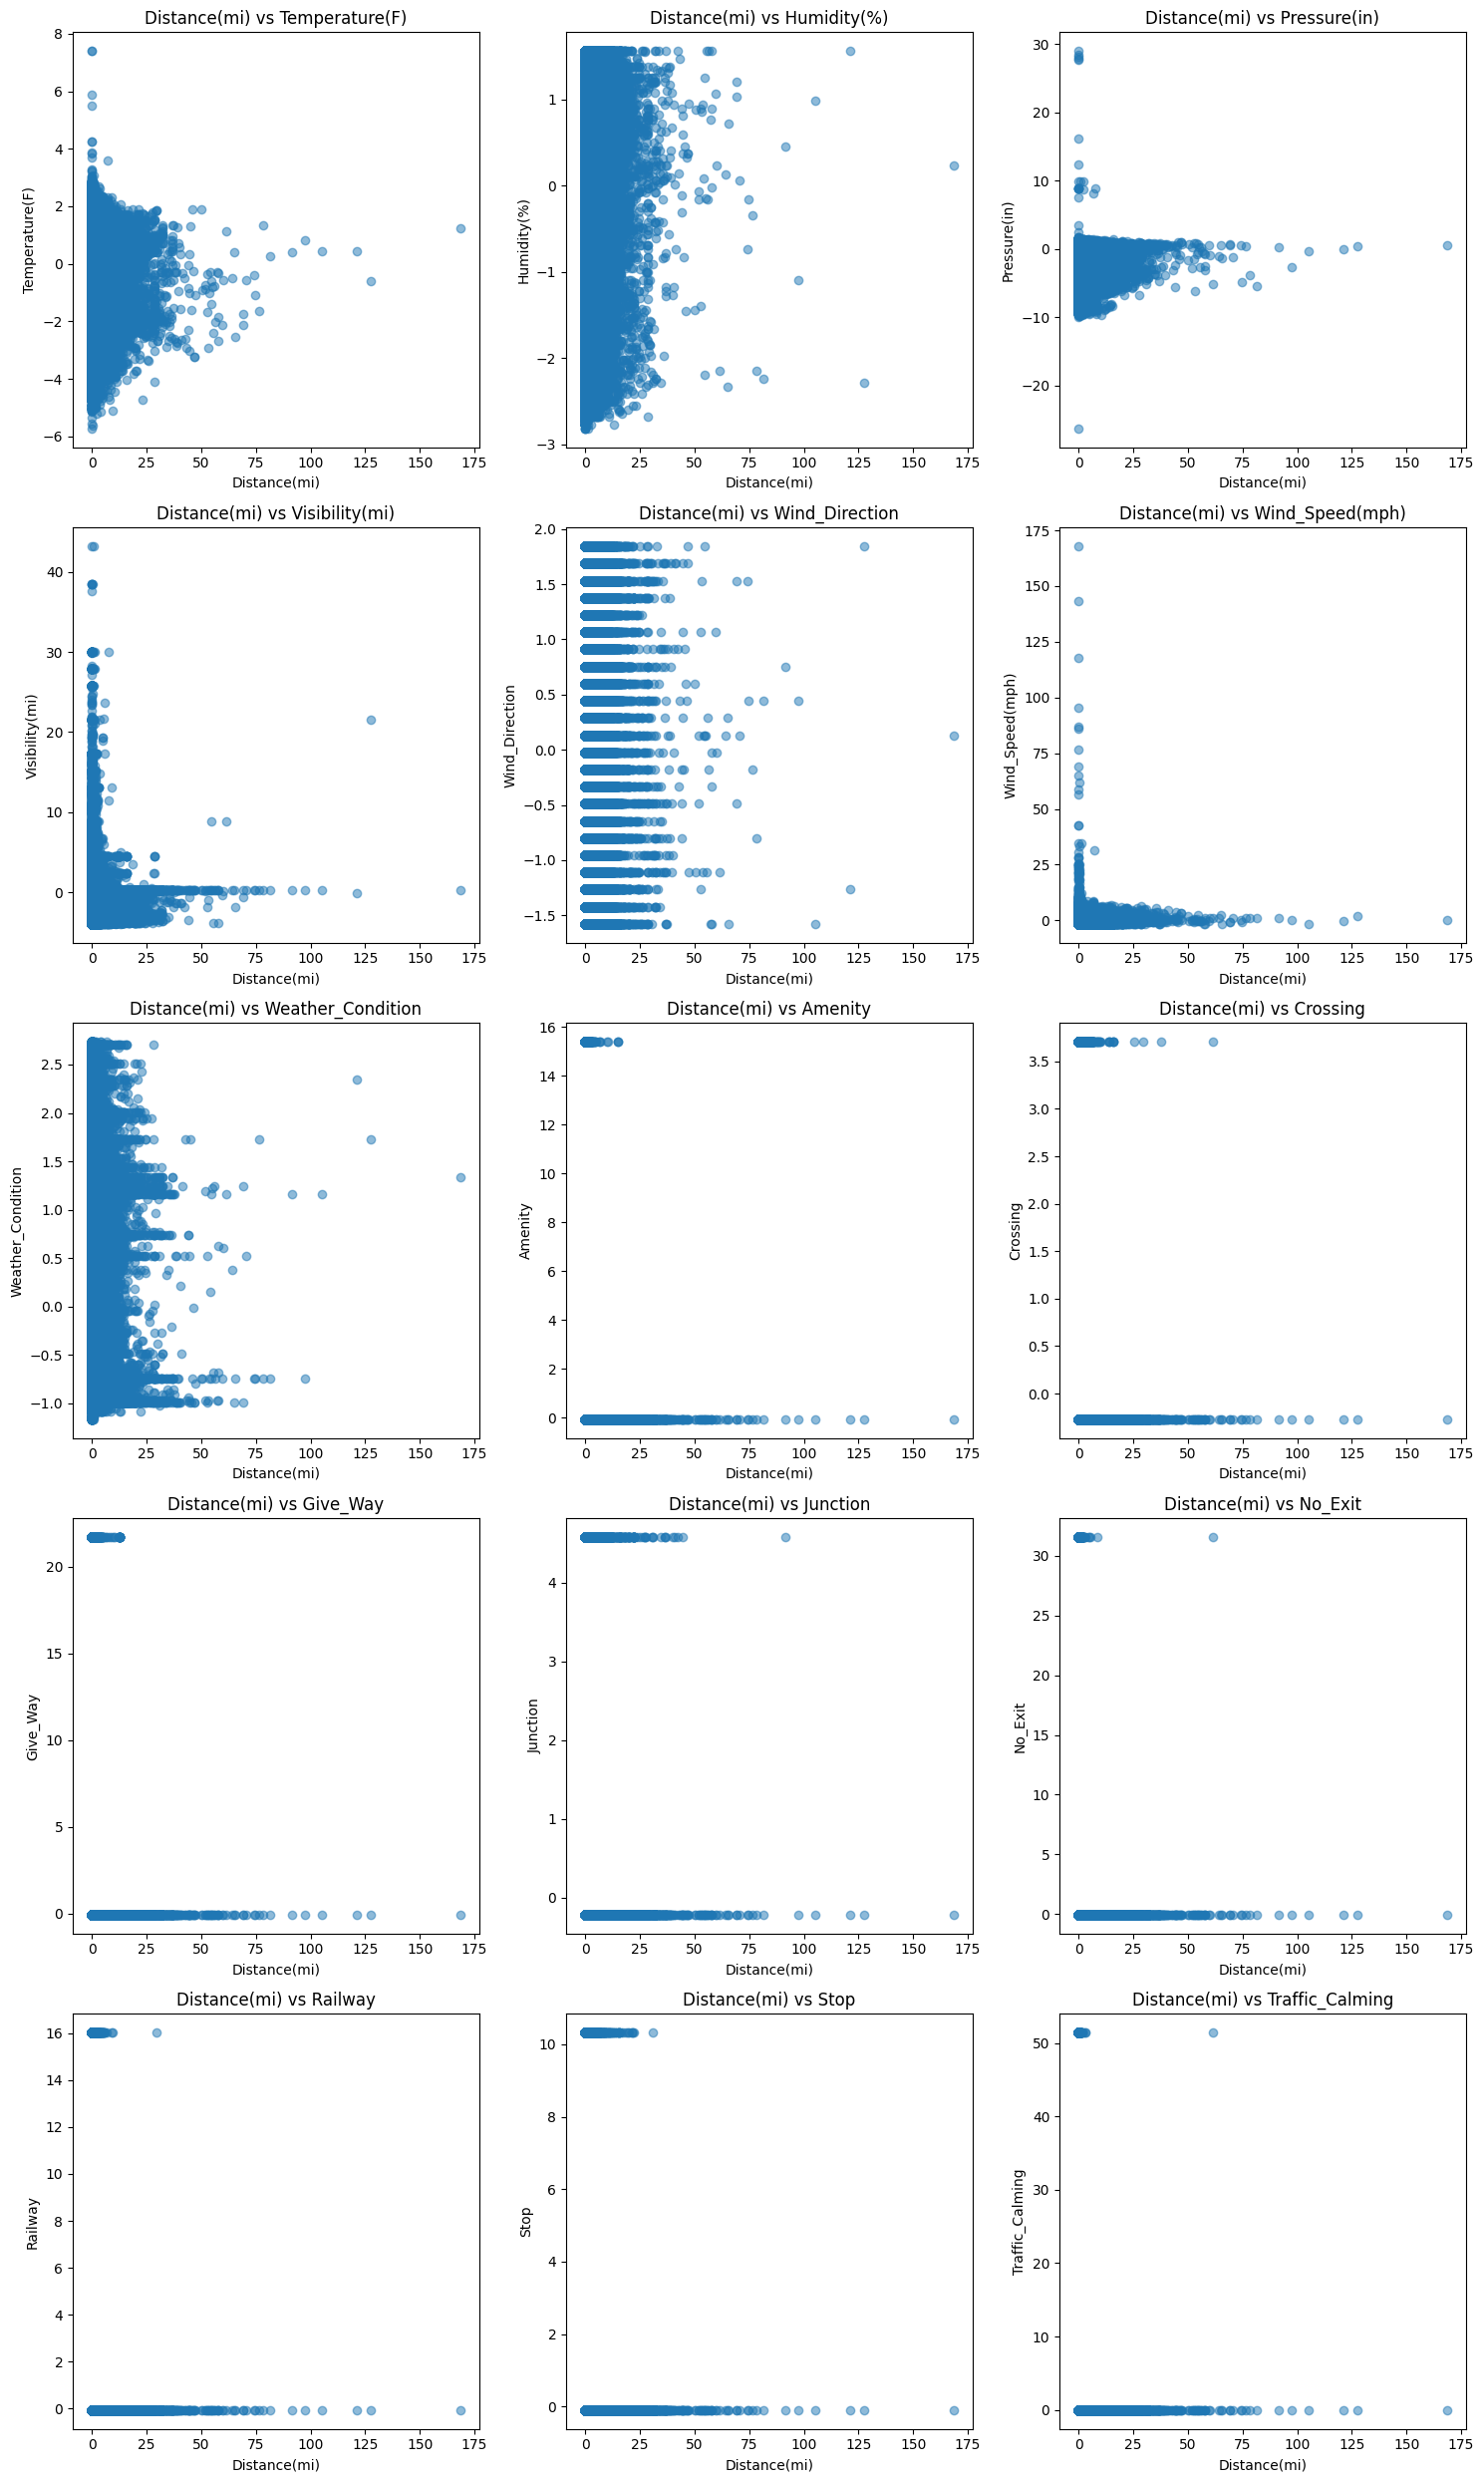

In [2]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("Train_Set.csv")

# Create a list of all columns that we are considering
features = [ 
    "Distance(mi)", "Temperature(F)", "Humidity(%)", "Pressure(in)", 
    "Visibility(mi)", "Wind_Direction", "Wind_Speed(mph)", 
    "Weather_Condition", "Amenity", "Crossing", "Give_Way", "Junction", 
    "No_Exit", "Railway", "Stop", "Traffic_Calming", "Traffic_Signal", 
    "Civil_Twilight", "Duration_Seconds", "cluster", "Severity"
]

# Create all combinations of considered columns (2 at a time)
combinations = list(itertools.combinations(features, 2))

# Limit the number of combinations to visualize
max_plots = 15  # Adjust this number as needed
combinations = combinations[:max_plots]

# Calculate the number of rows and columns for subplots
num_plots = len(combinations)
cols = 3  # Define number of columns
rows = (num_plots // cols) + (num_plots % cols > 0)  # Dynamically calculate rows

# Create a figure with the correct size
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten the axes array for easier iteration (if rows > 1)
axes = axes.flatten()

# Plot each feature combination
for i, combination in enumerate(combinations):
    ax = axes[i]
    ax.scatter(data[combination[0]], data[combination[1]], alpha=0.5)
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.set_title(f"{combination[0]} vs {combination[1]}")

# Hide unused subplots
for j in range(len(combinations), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Lineare Regression

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Separate features and target variable from the training data
X = data.drop(columns=["Severity"])
y = data["Severity"]

# Load the test set (assuming the test set has both features and target variable)
test_data = pd.read_csv('Test_Set.csv')

# Separate features and target variable for the test set
X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

# Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X, y)  # Train the model using the entire dataset (or training set if it's separate)

# Predictions
y_pred_lr = model_lr.predict(X_test)  # Use the loaded test set for predictions

# Round predictions, since "Severity" is discrete
y_pred_lr_rounded = y_pred_lr.round()

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr_rounded)
mse_lr = mean_squared_error(y_test, y_pred_lr_rounded)

# Output the results
print(f"Linear Regression - MAE: {mae_lr}")
print(f"Linear Regression - MSE: {mse_lr}")

Linear Regression - MAE: 0.5254777963110692
Linear Regression - MSE: 0.5820117484951773


# Random Forest Regression

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Separate features and target variable from the training data
X = data.drop(columns=["Severity"])
y = data["Severity"]

# Load the test set (assuming the test set has both features and target variable)
test_data = pd.read_csv('Test_Set.csv')

# Separate features and target variable for the test set
X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

# Random Forest Regression with pre-pruning
model_rf = RandomForestRegressor(
    random_state=42,
    max_depth=10,  # Limit the depth of the trees
    min_samples_split=5,  # Increase the minimum number of samples required to split a node
    min_samples_leaf=4,  # Set the minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Use only a subset of features for each split
    n_estimators=100,  # Number of trees in the forest
    n_jobs=-1  # Use all CPU cores for parallel processing
)

# Train the model
model_rf.fit(X, y)  # Train the model using the entire dataset (or training set if it's separate)

# Predictions
y_pred_rf = model_rf.predict(X_test)  # Use the loaded test set for predictions

# Round predictions, since "Severity" is discrete
y_pred_rf_rounded = y_pred_rf.round()

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf_rounded)
mse_rf = mean_squared_error(y_test, y_pred_rf_rounded)

# Output the results
print(f"Random Forest Regression - MAE: {mae_rf}")
print(f"Random Forest Regression - MSE: {mse_rf}")


Random Forest Regression - MAE: 0.6324596900911355
Random Forest Regression - MSE: 0.6490332874030024


# Gradient Boosting Regressor

In [6]:
# Importiere die nötigen Bibliotheken
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X, y)

# Vorhersagen
y_pred_gb = model_gb.predict(X_test)

# Ergebnisse runden, da "Severity" diskret ist
y_pred_gb_rounded = y_pred_gb.round()

# Evaluation
mae_gb = mean_absolute_error(y_test, y_pred_gb_rounded)
mse_gb = mean_squared_error(y_test, y_pred_gb_rounded)

print(f"Gradient Boosting Regressor - MAE: {mae_gb}")
print(f"Gradient Boosting Regressor - MSE: {mse_gb}")


Gradient Boosting Regressor - MAE: 0.6430497739744241
Gradient Boosting Regressor - MSE: 0.6805347257475766


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# xgboost Regressor
model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=42)  # n_jobs=-1 nutzt alle CPU-Kerne
model_xgb.fit(X, y)

# Predictions
y_pred_xgb = model_xgb.predict(X_test)

# Round predictions, since "Severity" is discrete
y_pred_xgb_rounded = y_pred_xgb.round()

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb_rounded)
mse_xgb = mean_squared_error(y_test, y_pred_xgb_rounded)

# Output the results
print(f"XGBoost - MAE: {mae_xgb}")
print(f"XGBoost - MSE: {mse_xgb}")

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/justus/Documents/GitHub/DataMining/.venv/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B22D7F05-77FA-34A6-8757-C605D2CFE1AD> /Users/justus/Documents/GitHub/DataMining/.venv/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file)"]


# Evaluation and Visulization

Lineare Regression - MAE: 0.5255, MSE: 0.5820, R^2: -1.5485
Random Forest Regression - MAE: 0.6325, MSE: 0.6490, R^2: -1.8420
Gradient Boosting Regressor - MAE: 0.6430, MSE: 0.6805, R^2: -1.9799


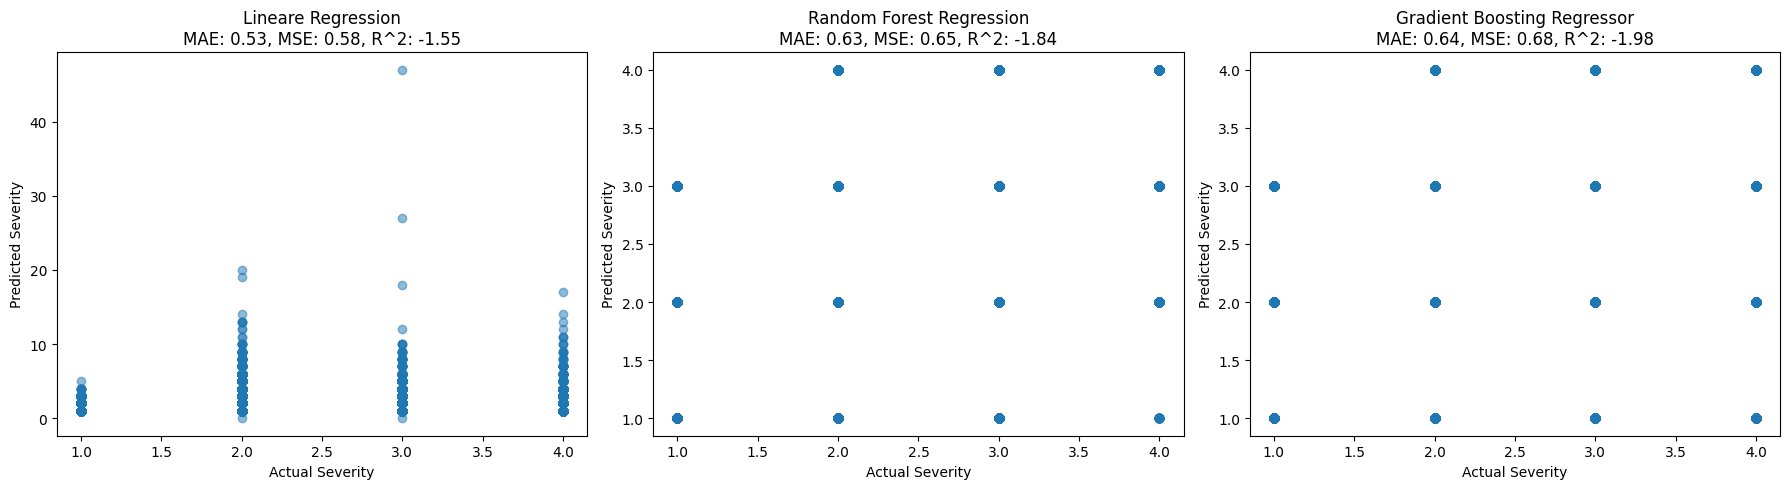

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Berechne die Evaluierungsmetriken für jedes Modell
mae_lr = mean_absolute_error(y_test, y_pred_lr_rounded)
mse_lr = mean_squared_error(y_test, y_pred_lr_rounded)
r2_lr = r2_score(y_test, y_pred_lr_rounded)

mae_rf = mean_absolute_error(y_test, y_pred_rf_rounded)
mse_rf = mean_squared_error(y_test, y_pred_rf_rounded)
r2_rf = r2_score(y_test, y_pred_rf_rounded)

mae_gb = mean_absolute_error(y_test, y_pred_gb_rounded)
mse_gb = mean_squared_error(y_test, y_pred_gb_rounded)
r2_gb = r2_score(y_test, y_pred_gb_rounded)

# Ausgabe der Metriken
print(f"Lineare Regression - MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, R^2: {r2_lr:.4f}")
print(f"Random Forest Regression - MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, R^2: {r2_rf:.4f}")
print(f"Gradient Boosting Regressor - MAE: {mae_gb:.4f}, MSE: {mse_gb:.4f}, R^2: {r2_gb:.4f}")

# Vergleich von tatsächlichen vs. vorhergesagten Werten für jedes Modell
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Lineare Regression
axs[0].scatter(y_test, y_pred_lr_rounded, alpha=0.5)
axs[0].set_title(f"Lineare Regression\nMAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R^2: {r2_lr:.2f}")
axs[0].set_xlabel("Actual Severity")
axs[0].set_ylabel("Predicted Severity")

# Random Forest Regression
axs[1].scatter(y_test, y_pred_rf_rounded, alpha=0.5)
axs[1].set_title(f"Random Forest Regression\nMAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R^2: {r2_rf:.2f}")
axs[1].set_xlabel("Actual Severity")
axs[1].set_ylabel("Predicted Severity")

# Gradient Boosting Regressor
axs[2].scatter(y_test, y_pred_gb_rounded, alpha=0.5)
axs[2].set_title(f"Gradient Boosting Regressor\nMAE: {mae_gb:.2f}, MSE: {mse_gb:.2f}, R^2: {r2_gb:.2f}")
axs[2].set_xlabel("Actual Severity")
axs[2].set_ylabel("Predicted Severity")

plt.tight_layout()
plt.show()


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate  # Importiere Tabulate für eine bessere Tabellenansicht

# Berechne die Evaluierungsmetriken für jedes Modell
mae_lr = mean_absolute_error(y_test, y_pred_lr_rounded)
mse_lr = mean_squared_error(y_test, y_pred_lr_rounded)
r2_lr = r2_score(y_test, y_pred_lr_rounded)

mae_rf = mean_absolute_error(y_test, y_pred_rf_rounded)
mse_rf = mean_squared_error(y_test, y_pred_rf_rounded)
r2_rf = r2_score(y_test, y_pred_rf_rounded)

mae_gb = mean_absolute_error(y_test, y_pred_gb_rounded)
mse_gb = mean_squared_error(y_test, y_pred_gb_rounded)
r2_gb = r2_score(y_test, y_pred_gb_rounded)

# Berechne die zusätzlichen Metriken für Klassifikationen
accuracy_lr = accuracy_score(y_test, y_pred_lr_rounded)
precision_lr = precision_score(y_test, y_pred_lr_rounded, average='binary')  # Für binäre Klassifikation
recall_lr = recall_score(y_test, y_pred_lr_rounded, average='binary')  # Für binäre Klassifikation
f1_lr = f1_score(y_test, y_pred_lr_rounded, average='binary')  # Für binäre Klassifikation

accuracy_rf = accuracy_score(y_test, y_pred_rf_rounded)
precision_rf = precision_score(y_test, y_pred_rf_rounded, average='binary')  # Für binäre Klassifikation
recall_rf = recall_score(y_test, y_pred_rf_rounded, average='binary')  # Für binäre Klassifikation
f1_rf = f1_score(y_test, y_pred_rf_rounded, average='binary')  # Für binäre Klassifikation

accuracy_gb = accuracy_score(y_test, y_pred_gb_rounded)
precision_gb = precision_score(y_test, y_pred_gb_rounded, average='binary')  # Für binäre Klassifikation
recall_gb = recall_score(y_test, y_pred_gb_rounded, average='binary')  # Für binäre Klassifikation
f1_gb = f1_score(y_test, y_pred_gb_rounded, average='binary')  # Für binäre Klassifikation

# Erstelle eine Tabelle der Ergebnisse
headers = ["Model", "MAE", "MSE", "R^2", "Accuracy", "Precision", "Recall", "F1-Score"]
table = [
    ["Lineare Regression", f"{mae_lr:.4f}", f"{mse_lr:.4f}", f"{r2_lr:.4f}", f"{accuracy_lr:.4f}", f"{precision_lr:.4f}", f"{recall_lr:.4f}", f"{f1_lr:.4f}"],
    ["Random Forest", f"{mae_rf:.4f}", f"{mse_rf:.4f}", f"{r2_rf:.4f}", f"{accuracy_rf:.4f}", f"{precision_rf:.4f}", f"{recall_rf:.4f}", f"{f1_rf:.4f}"],
    ["Gradient Boosting", f"{mae_gb:.4f}", f"{mse_gb:.4f}", f"{r2_gb:.4f}", f"{accuracy_gb:.4f}", f"{precision_gb:.4f}", f"{recall_gb:.4f}", f"{f1_gb:.4f}"]
]

# Ausgabe der Tabelle
print(tabulate(table, headers=headers, tablefmt="grid"))

# Vergleich von tatsächlichen vs. vorhergesagten Werten für jedes Modell
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Lineare Regression
axs[0].scatter(y_test, y_pred_lr_rounded, alpha=0.5)
axs[0].set_title(f"Lineare Regression\nMAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R^2: {r2_lr:.2f}")
axs[0].set_xlabel("Actual Severity")
axs[0].set_ylabel("Predicted Severity")

# Random Forest Regression
axs[1].scatter(y_test, y_pred_rf_rounded, alpha=0.5)
axs[1].set_title(f"Random Forest Regression\nMAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R^2: {r2_rf:.2f}")
axs[1].set_xlabel("Actual Severity")
axs[1].set_ylabel("Predicted Severity")

# Gradient Boosting Regressor
axs[2].scatter(y_test, y_pred_gb_rounded, alpha=0.5)
axs[2].set_title(f"Gradient Boosting Regressor\nMAE: {mae_gb:.2f}, MSE: {mse_gb:.2f}, R^2: {r2_gb:.2f}")
axs[2].set_xlabel("Actual Severity")
axs[2].set_ylabel("Predicted Severity")

plt.tight_layout()
plt.show()

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].